###
### 1. Importing libraries
###

In [24]:
import pandas as pd
import seaborn as sns    
import numpy as np
import matplotlib.pyplot as plt

###
### 2. Reading data from CSV
###

In [25]:
df=pd.read_csv('Assignment5Dataset.csv')
df.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


###
### 3. Viewing characteristics
###

In [26]:
df.describe()

,X1,X2
count,1500.000000,1500.000000
mean,0.498501,0.251743
std,0.868054,0.496365
min,-1.112339,-0.628397
25%,-0.036013,-0.202562
50%,0.497101,0.246369
75%,1.037322,0.718451
max,2.095098,1.119580


###
### 4. Checking data information and missing values
###

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


###
### 5. Visualizing data
###

<Axes: xlabel='X1', ylabel='X2'>

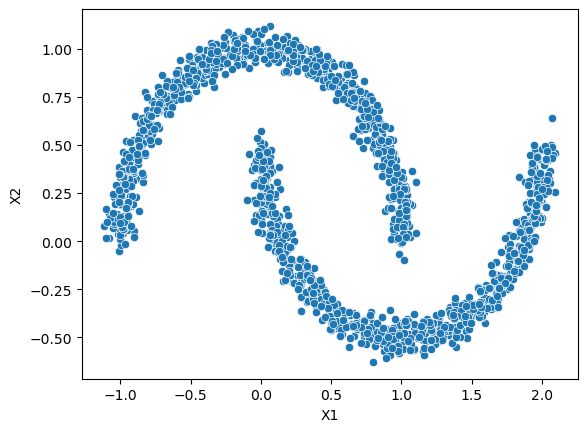

In [28]:
sns.scatterplot(x=df['X1'],y=df['X2'])

###
### 6. Implementing and visualizing K-Means clustering
###

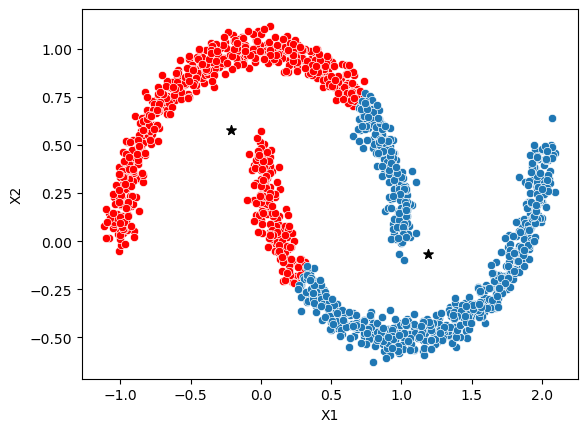

In [29]:
u1,u2=(0,1),(1.-0.5)
filtered_df1 = df
filtered_df2=df
j=0
while(j<=100):
    k = []
    i=0
    while(i<1500):
        temp1=np.sqrt(np.sum((df.iloc[i,:]-u1)**2))
        temp2=np.sqrt(np.sum((df.iloc[i,:]-u2)**2))
        if temp1>=temp2:
            k.append([1,0])
        else:
            k.append([0,1])
        i=i+1

    k=np.array(k)
    # Step 1: Find indices where the first column of k is 1
    indices1 = np.where(k[:, 0] == 1)[0]
    indices2=np.where(k[:, 1] == 1)[0]

    # Step 2: Select rows from df corresponding to these indices
    filtered_df1 = df.iloc[indices1]
    filtered_df2=df.iloc[indices2]
    
    
    # Step 3: Compute the mean of the filtered rows
    x1= (filtered_df1.iloc[:,0].mean(),filtered_df1.iloc[:,1].mean())
    x2= (filtered_df2.iloc[:,0].mean(),filtered_df2.iloc[:,1].mean())
    if x1==u1 and x2==u2:
        break
    else:
        u1,u2=x1,x2
        j=j+1


sns.scatterplot(x=filtered_df2.iloc[:,0],y=filtered_df2.iloc[:,1],color='red')        
sns.scatterplot(x=filtered_df1.iloc[:,0],y=filtered_df1.iloc[:,1])
plt.scatter(x=u1[0], y=u1[1], marker='*', s=50, color='black')
plt.scatter(x=u2[0], y=u2[1], marker='*', s=50, color='black')




###
### 7. Implementation of Spectral clustering without normalization
###

In [31]:
from sklearn.cluster import SpectralClustering

In [32]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(df) 

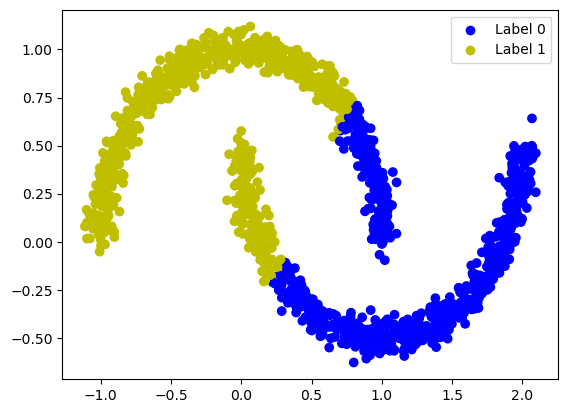

In [33]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 
  
# Plotting the clustered scatter plot 

plt.scatter(df['X1'], df['X2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


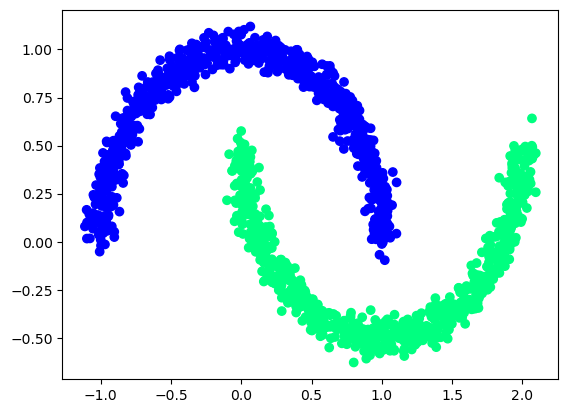

In [34]:
plt.scatter(df['X1'], df['X2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(df), cmap =plt.cm.winter) 
plt.show()

In [35]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(df) 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [36]:
from sklearn.metrics import silhouette_score 

In [37]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(df, labels_rbf)) 
s_scores.append(silhouette_score(df, labels_nn)) 
  
print(s_scores) 

[0.49157420658547063, 0.333441608138739]


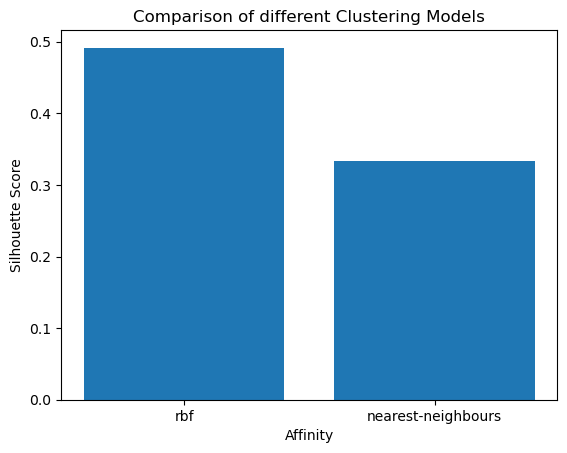

In [38]:
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show()

###
### 8. Implementation of Spectral clustering with Standardization and Normalization of data
###

In [39]:
from sklearn.preprocessing import StandardScaler, normalize 

scaler=StandardScaler()

df_scaled=scaler.fit_transform(df)
df_normalized = normalize(df_scaled)
df_normalized

array([[ 0.14292394, -0.98973367],
       [ 0.77336253, -0.63396404],
       [ 0.79433395, -0.60748134],
       ...,
       [-0.90925707,  0.41623501],
       [ 0.87823712, -0.47822544],
       [-0.6989933 , -0.71512822]])

In [40]:
df=pd.DataFrame(df_normalized,columns=df.columns)
df

,X1,X2
0,0.142924,-0.989734
1,0.773363,-0.633964
2,0.794334,-0.607481
3,-0.813246,0.581921
4,0.667579,-0.744539
...,...,...
1495,0.997019,-0.077161
1496,0.894520,0.447028
1497,-0.909257,0.416235
1498,0.878237,-0.478225


In [41]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(df)

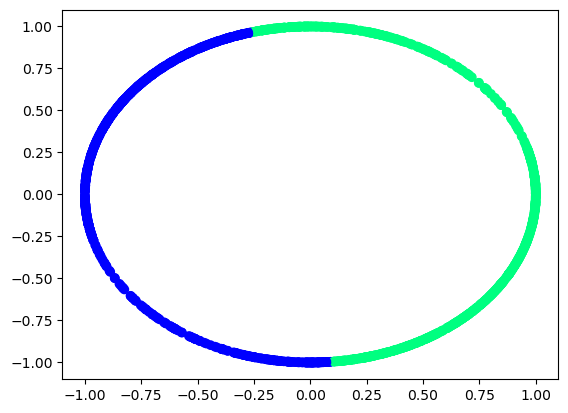

In [43]:
plt.scatter(df['X1'], df['X2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(df), cmap =plt.cm.winter) 
plt.show()

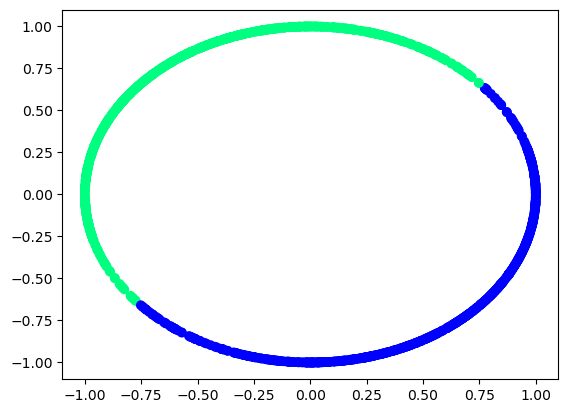

In [44]:
plt.scatter(df['X1'], df['X2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(df), cmap =plt.cm.winter) 
plt.show()

In [45]:
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(df, labels_rbf)) 
s_scores.append(silhouette_score(df, labels_nn)) 
  
print(s_scores) 

[0.5451356118553567, 0.36283006988911987]


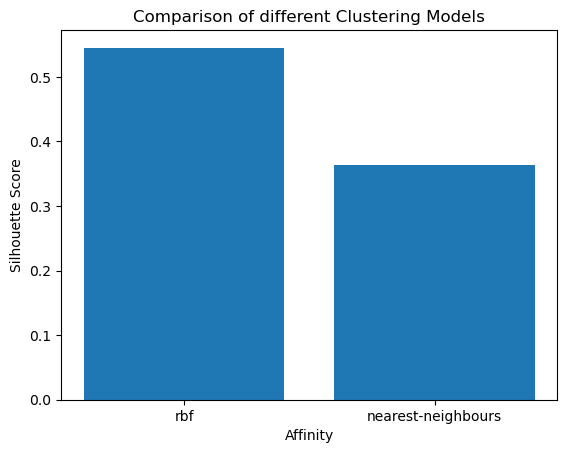

In [46]:
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show()